<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Exploratory Data Analysis and Feature Extraction - Final Assignment</font></h1>


# Lib Imports

In [166]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 10

# Constants

## Tech Company Membership

The below lists will be used to aggregate companies based on whether they are part of the various 'FAANG' listings or not. The criteria for inclusion is based on the below wikipedia page.

https://en.wikipedia.org/wiki/Big_Tech

In [167]:
BIG_FOUR = ['Google', 'Apple', 'Amazon', 'Meta']
BIG_FIVE = ['Google', 'Amazon', 'Apple', 'Meta', 'Microsoft']
MAGNIFICANT_SEVEN = ['Google', 'Amazon', 'Apple', 'Meta', 'Microsoft', 'Nvidia', 'Tesla']
CHINESE_TECH = ['Baidu', 'Alibaba', 'Tencent', 'Xiaomi']

# Dataset Import

* Name: tech_layoffs
* Source: kaggle
* Url: https://www.kaggle.com/datasets/salimwid/technology-company-layoffs-20222023-data

In [168]:
df = pd.read_csv('./data/tech_layoffs_til_Q1_2024.csv', delimiter=';')
df.head()

,Nr.,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,2,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,3,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,4,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,5,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [169]:
df.columns

Index(['Nr.', '#', 'Company', 'Location_HQ', 'Country', 'Continent',
       'Laid_Off', 'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year', 'lat', 'lng'],
      dtype='object')

### 1.1 Data Preprocessing

First going to analyse the dtypes of the various columns.

In [170]:
df.dtypes

Nr.                        int64
#                          int64
Company                   object
Location_HQ               object
Country                   object
                          ...   
Stage                     object
Money_Raised_in_$_mil     object
Year                       int64
lat                      float64
lng                      float64
Length: 17, dtype: object

In [171]:
df.describe()

,Nr.,#,Laid_Off,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Year,lat,lng
count,1672.000000,1672.000000,1565.000000,1570.000000,1511.000000,1536.000000,1672.000000,1672.000000,1672.000000
mean,836.500000,2064.454545,278.387859,22.908014,3656.882859,3319.764757,2022.200957,34.347327,-59.878868
std,482.809141,1023.379865,886.840962,22.639925,21855.230097,21048.185867,1.302412,18.010614,74.139291
min,1.000000,3.000000,3.000000,0.044980,4.000000,0.000000,2020.000000,-41.286640,-123.262044
25%,418.750000,1209.750000,40.000000,9.060269,218.000000,150.000000,2022.000000,34.052230,-122.325530
50%,836.500000,2188.500000,87.000000,15.000000,553.000000,424.000000,2022.000000,37.774930,-79.398640
75%,1254.250000,2990.250000,200.000000,28.000000,1500.000000,1200.000000,2023.000000,42.358430,-0.125740
max,1672.000000,3537.000000,12000.000000,100.000000,400000.000000,392000.000000,2024.000000,60.204767,174.775570


Most of the dtypes are consistent with what I would expect to see; Laid_Off are numeric, Industry/Stage and strings and therefore represented as objects etc. I'll just analyse the distribution of the Laid_Off values, as these will be crucial in analysing the tech layoffs across Companies, Region and Sector.

### 1.2 Investigating missing columns

There is one missing value for Company, so this value will just be removed. In order to evaluate the impact of the other missing values, I will need to calculate the percentage of each column which is missing.

There seem to be quite a few missing values. These will be investigated in the next section.

In [172]:
df.isna().sum()

Nr.                       0
#                         0
Company                   1
Location_HQ               0
Country                   0
                         ..
Stage                     0
Money_Raised_in_$_mil    76
Year                      0
lat                       0
lng                       0
Length: 17, dtype: int64

In [173]:
def print_missing_percentage(df: pd.DataFrame, col_name: str) -> float:
    mask = (df[col_name].isna())
    len_missing = len(df[mask])
    len_df = len(df)
    percentage_missing = (len_missing / len_df) * 100.0
    print(f"col_name: {col_name}, missing (%): {percentage_missing}")
    return percentage_missing

In [174]:
missing_cols = ['Laid_Off', 'Percentage', 'Company_Size_before_Layoffs', 'Company_Size_after_layoffs', 'Money_Raised_in_$_mil']

In [175]:
missing_percentages = [print_missing_percentage(df, col) for col in missing_cols]

col_name: Laid_Off, missing (%): 6.399521531100478
col_name: Percentage, missing (%): 6.100478468899522
col_name: Company_Size_before_Layoffs, missing (%): 9.629186602870814
col_name: Company_Size_after_layoffs, missing (%): 8.133971291866029
col_name: Money_Raised_in_$_mil, missing (%): 4.545454545454546


Overall, I would say that the missing values to Laid_Off are the most significant, as the main goal of the dataset is to evaluate layoffs. Given this, I will most just remove these missing values, and then rerun the missing percentages to see how this has impacted to missing proportions.

In [176]:
missing_laid_off_mask = (df['Laid_Off'].isna())

In [177]:
df = df[~missing_laid_off_mask]

In [178]:
df.isna().sum()

Nr.                       0
#                         0
Company                   0
Location_HQ               0
Country                   0
                         ..
Stage                     0
Money_Raised_in_$_mil    58
Year                      0
lat                       0
lng                       0
Length: 17, dtype: int64

This has resulted in a significant change in the proportion of missing values. The Percentage, Company_Size_before_Layoffs and Company_size_after_layoffs have all basically halved. I will now recalculate the missing percentages based on the new data distribution.

In [179]:
missing_percentages = [print_missing_percentage(df, col) for col in missing_cols]

col_name: Laid_Off, missing (%): 0.0
col_name: Percentage, missing (%): 3.450479233226837
col_name: Company_Size_before_Layoffs, missing (%): 3.450479233226837
col_name: Company_Size_after_layoffs, missing (%): 3.386581469648562
col_name: Money_Raised_in_$_mil, missing (%): 3.706070287539936


The missing percentages are now around 3%, which is acceptable for removal. However, it is worth analysing these missing datasets to better understand what might be the cuase. My hunch is that the majority of missing data for Percentage and Company_Size will be accounted for by startups, as established companies need to report this data to shareholders.

Based on this, I will created a mask in an attempt to separate between these types of companies.

In [180]:
missing_data_mask = ((df['Percentage'].isna()) | (df['Company_Size_before_Layoffs'].isna()) 
                     | (df['Company_Size_after_layoffs'].isna()))

In [181]:
missing_data_df = df[missing_data_mask]
missing_data_df

,Nr.,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
1408,1409,3274,Orbotech,Yavne,Israel,Asia,100.0,2024-03-19,NaN,NaN,0.0,Manufact…,Acquired,NaN,2024,31.876886,34.738297
1411,1412,3277,Flock Freight,San Diego,USA,North America,54.0,2024-03-16,NaN,NaN,NaN,Logistics,Series D,$399,2024,32.715710,-117.164720
1412,1413,3278,Chipper Cash,San Francisco Bay Area,USA,North America,20.0,2024-03-15,NaN,NaN,NaN,Finance,Series C,$302,2024,37.774930,-122.419420
1444,1445,3310,PropertyGuru,Singapore,Singapore,Asia,79.0,2024-02-27,NaN,NaN,NaN,Real Estate,Post-IPO,$676,2024,1.289670,103.850070
1447,1448,3313,WayCool,Chennai,India,Asia,70.0,2024-02-26,NaN,NaN,NaN,Food,Unknown,$363,2024,13.087840,80.278470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,3520,Solarisbank,Berlin,Germany,Europe,20.0,2023-12-14,NaN,NaN,NaN,Finance,Unknown,$385,2024,52.524370,13.410530
1662,1663,3528,Analog Devices,San Francisco Bay Area,USA,North America,111.0,2023-12-13,NaN,NaN,NaN,Manufact…,Post-IPO,NaN,2024,37.336166,-121.890591
1663,1664,3529,ForgeRock,San Francisco Bay Area,USA,North America,109.0,2023-12-13,NaN,NaN,NaN,Other,Acquired,$234,2024,37.774930,-122.419420
1664,1665,3530,Flex,San Francisco Bay Area,USA,North America,31.0,2023-12-13,NaN,NaN,NaN,Manufact…,Unknown,NaN,2024,37.774930,-122.419420


In [182]:
print(f"Length of missing data: {len(missing_data_df)}")

Length of missing data: 54


In [183]:
missing_data_df['Company'].unique()

array(['Orbotech', 'Flock Freight', 'Chipper Cash', 'PropertyGuru',
       'WayCool', 'Redesign Health', 'Carbon Health', 'Affirm', 'Aptiv',
       'Pure Storage', 'Grammarly', 'Amazon', 'BillGO', 'Illumina',
       'Trove Recommer…', 'CircleCI', 'Thinx', 'TechCrunch',
       'DispatchHealth', 'Microsoft', 'Amperity', 'Personio', 'Cure.fit',
       'GoStudent', 'GoTo', 'Seedr', 'Xendit', 'TikTok', 'YouTube',
       'Sirplus', 'Veeam', 'GrabCAD', 'New Work SE', 'Cloudflare',
       'Google', 'IAC', 'Beam Benefits', 'Instagram', 'Branch',
       'Uber Freight', 'The Messenger', 'Paytm', 'Intel', 'Checkout.com',
       'Arm Holdings', 'eBay', 'Glowforge', 'Solarisbank',
       'Analog Devices', 'ForgeRock', 'Flex', 'TomTom'], dtype=object)

It looks like my initial theory was incorrect, as there seem to be alot of established companies (Instagram, Google, Microsoft) in the above list. On further reflection, it could be the case that the dataset is not up to date, as all of the entries which have missing values are from with last 3-4 months (December 2023 onwards). I will create a mask which filters the dataset based on the earliest entry in these missing values, to determine whether this is the case.

In [184]:
earliest_date = min(missing_data_df['Date_layoffs'])
earliest_date

'2023-12-12'

So the earliest entry in this missing dataset is 12/12/2023, so I will filter the original dataset based on this to determine if there is still missing data.

In [185]:
date_mask = (df['Date_layoffs'] < earliest_date)

In [186]:
filtered_df = df[date_mask]
filtered_df.isna().sum()

Nr.                       0
#                         0
Company                   0
Location_HQ               0
Country                   0
                         ..
Stage                     0
Money_Raised_in_$_mil    38
Year                      0
lat                       0
lng                       0
Length: 17, dtype: int64

Money_raised is now the only column which has missing values. I will take a quick look at the distribution of these missing entries.

In [187]:
filtered_df[filtered_df['Money_Raised_in_$_mil'].isna()]

,Nr.,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
11,12,38,Navan,San Francisco Bay Area,USA,North America,145.0,2023-12-05,5.0,2900.0,2755.0,Finance,Unknown,NaN,2023,37.44188,-122.14302
49,50,200,Epic Games,Raleigh,USA,North America,870.0,2023-09-28,16.0,5438.0,4568.0,Consumer,Unknown,NaN,2023,35.77210,-78.63861
73,74,276,Zebra Technologies,Chicago,USA,North America,700.0,2023-08-28,7.0,10000.0,9300.0,Manufacturing,Post-IPO,NaN,2023,41.85003,-87.65005
90,91,342,Discord,San Francisco Bay Area,USA,North America,37.0,2023-08-03,4.0,925.0,888.0,Consumer,Series H,NaN,2023,37.77493,-122.41942
124,125,456,FNZ,London,United Kingdom,Europe,1000.0,2023-07-06,15.0,6667.0,5667.0,Finance,Private Equity …,NaN,2023,51.50853,-0.12574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,1110,2745,Uber,Amsterdam,Netherlands,Europe,225.0,2020-06-12,25.0,900.0,675.0,Transportation,Post-IPO,NaN,2020,52.37403,4.88969
1214,1215,2919,Oscar Health,New York City,USA,North America,70.0,2020-04-23,5.0,1400.0,1330.0,Healthcare,Unknown,NaN,2020,40.71427,-74.00597
1255,1256,2997,Groupon,Chicago,USA,North America,2800.0,2020-04-13,44.0,6364.0,3564.0,Retail,Post-IPO,NaN,2020,41.85003,-87.65005
1359,1360,3183,OneWeb,London,United Kingdom,Europe,451.0,2020-03-27,85.0,531.0,80.0,Aerospace,Unknown,NaN,2020,51.50853,-0.12574


Overall, I don't think that this is an important feature, so will just remove it.

So to summarise, the below filtering will be applied to the dataframe to resolve missing entries:

* 1. Filter entries prior to 12/12/2023
* 2. Remove any missing Money_raised columns

In [188]:
earliest_date = min(missing_data_df['Date_layoffs'])
to_remove_mask = ((df['Date_layoffs'] < earliest_date) & (~df['Money_Raised_in_$_mil'].isna()))

In [189]:
df = df[to_remove_mask]
df.isna().sum()

Nr.                      0
#                        0
Company                  0
Location_HQ              0
Country                  0
                        ..
Stage                    0
Money_Raised_in_$_mil    0
Year                     0
lat                      0
lng                      0
Length: 17, dtype: int64

In [190]:
df.head()

,Nr.,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
8,9,27,Chipper Cash,San Francisco Bay Area,USA,North America,15.0,2023-12-11,33.0,45.0,30.0,Finance,Series C,$302,2023,37.77493,-122.41942
9,10,31,Zulily,Seattle,USA,North America,839.0,2023-12-08,100.0,839.0,0.0,Retail,Acquired,$194,2023,47.60621,-122.33207
10,11,37,ZestMoney,Bengaluru,India,Asia,150.0,2023-12-05,100.0,150.0,0.0,Finance,Series C,$120,2023,12.97194,77.59369
12,13,39,Incredibuild,Tel Aviv,Israel,Asia,40.0,2023-12-05,20.0,200.0,160.0,Product,Series B,$35,2023,32.08088,34.78057
13,14,44,Spotify,Stockholm,Sweden,Europe,1500.0,2023-12-04,17.0,9200.0,7700.0,Media,Post-IPO,$2100,2023,59.32938,18.06871


In [191]:
len(df)

1357

## 2. Data Analysis

For starters, I will analyse the distribution of Laid_Off and do some groupings based on Company and Region to analyse the distribution of layoffs based on these filters.


### 2.1 General Analysis

In [192]:
df.head()

,Nr.,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
8,9,27,Chipper Cash,San Francisco Bay Area,USA,North America,15.0,2023-12-11,33.0,45.0,30.0,Finance,Series C,$302,2023,37.77493,-122.41942
9,10,31,Zulily,Seattle,USA,North America,839.0,2023-12-08,100.0,839.0,0.0,Retail,Acquired,$194,2023,47.60621,-122.33207
10,11,37,ZestMoney,Bengaluru,India,Asia,150.0,2023-12-05,100.0,150.0,0.0,Finance,Series C,$120,2023,12.97194,77.59369
12,13,39,Incredibuild,Tel Aviv,Israel,Asia,40.0,2023-12-05,20.0,200.0,160.0,Product,Series B,$35,2023,32.08088,34.78057
13,14,44,Spotify,Stockholm,Sweden,Europe,1500.0,2023-12-04,17.0,9200.0,7700.0,Media,Post-IPO,$2100,2023,59.32938,18.06871


In [193]:
df.dtypes

Nr.                        int64
#                          int64
Company                   object
Location_HQ               object
Country                   object
                          ...   
Stage                     object
Money_Raised_in_$_mil     object
Year                       int64
lat                      float64
lng                      float64
Length: 17, dtype: object

### 2.2 Analysing distribution of Laid_Off

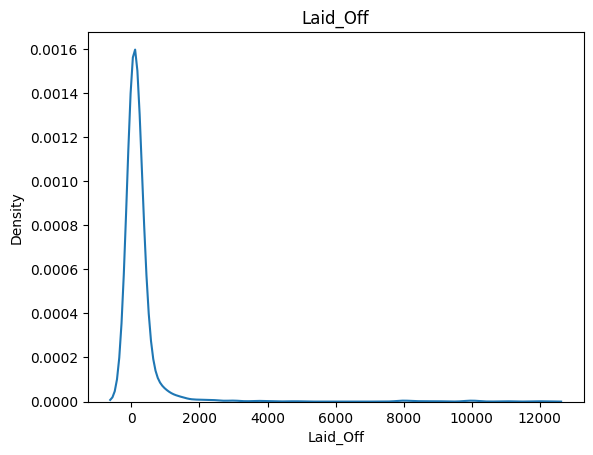

In [194]:
sns.kdeplot(x=df['Laid_Off'])
plt.title('Laid_Off')
plt.show()

The above plot indicates that there is a significant positive skew within the Laid_Off dataset, which is expected as the majority of layoffs were accounted for by the larger tech companies.

### 2.3 Analysing Layoffs by Company

The next step is to analyze layoffs by company.

In [195]:
df['Company'].value_counts()

Company
Gopuff               5
Blend                5
Chipper Cash         4
FrontRow             4
Pear Therapeutics    4
                    ..
&Open                1
Cisco                1
Wayflyer             1
Lokalise             1
Tamara Mellon        1
Name: count, Length: 1093, dtype: int64

There do seem to be quite a few multiple entries for companies, so it would be worthwhile to add a separate column for Total_Laid_Off, which aggregates laid of by company.

In [196]:
df['Total_Laid_Off'] = df.groupby('Company')['Laid_Off'].transform('sum')

It will also be worth adding column 'Num_Layoffs', which represents how many times a company had layoffs during the time period.

In [200]:
df['Num_Layoffs'] = df.groupby(['Company'])['Location_HQ'].transform('count')

Now I will reorder the columns.

In [208]:
cur_columns = df.columns.to_list()
laid_off_index = cur_columns.index('Laid_Off')
new_columns = cur_columns[: laid_off_index + 1] + cur_columns[-2:] + cur_columns[laid_off_index + 1: -2]
assert(len(cur_columns) == len(new_columns))
new_columns

['Nr.',
 '#',
 'Company',
 'Location_HQ',
 'Country',
 'Continent',
 'Laid_Off',
 'Total_Laid_Off',
 'Num_Layoffs',
 'Date_layoffs',
 'Percentage',
 'Company_Size_before_Layoffs',
 'Company_Size_after_layoffs',
 'Industry',
 'Stage',
 'Money_Raised_in_$_mil',
 'Year',
 'lat',
 'lng']

In [ ]:
df = df[new_columns]

In [87]:
grouped_df.describe()

,Laid_Off,Num_Layoffs
count,1100.000000,1100.000000
mean,316.751818,1.233636
std,1314.585867,0.553716
min,3.000000,1.000000
25%,37.750000,1.000000
50%,85.000000,1.000000
75%,198.500000,1.000000
max,27150.000000,5.000000


Now I'm going to plot the histogram of the aggregated layoffs of the top 10 companies.

In [88]:
top_n_companies = 10

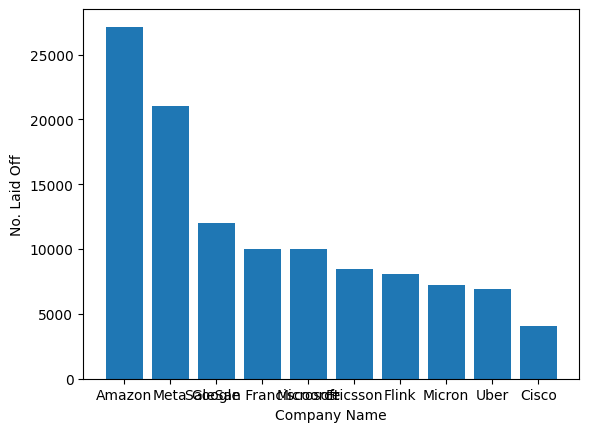

In [89]:
companies = grouped_df['Company'][:top_n_companies]
laid_off = grouped_df['Laid_Off'][:top_n_companies]
fig = plt.bar(companies, laid_off)
plt.xlabel('Company Name')
plt.ylabel('No. Laid Off')
plt.show()

# 3. Formulating Hypothesis

Based on reporting and understanding of Tech Layoffs over the last few years, my initial hypothesis is below:

* 1. FAANG Companies will account for the largest percentage of tech layoffs
* 2. San Francisco will account for the largest proportion of tech layoffs by region based on the same hypothesis above.
* 3. Based on layoff magnitude (the percentage of layoffs related to employees) and frequency, the FAANG companies will demonstrate worse long-term hiring practices over the last few years

### Analysing Layoff Magnitude and Frequency

It will be interesting to analyse the magnitude and frequency of tech layoffs in these companies, as it will help to indicate which firms have better long-term hiring. planning and budgeting practices. You would expect companies with better planning and hiring practices to have lower proportional layoffs based on percentage of workforce, as well as lower frequency layoffs over this time period. I will be interesting to see if FAANG companies will be accounted for in this category.